## Machine Learning Image Classification
I will use the Fashion MNIST data set obtained from https://github.com/zalandoresearch/fashion-mnist.  Each image is a 28x28 grayscale image corresponding to one of 10 different articles of clothing.  I will use tensorflow to create a machine learning model that classifies each image.

First, I import tensorflow and the other libraries needed.

In [2]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=0b61833927fbb4bf374ce25f879e66ff01714048f654f240ff42029186c14903
  Stored in directory: c:\users\weldm\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled h5py-2.8.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Now I load in the clothing data set.  Then the data is split into the images that are going to be used for training the model, and then the images that will be used to test the model.

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Next, the 28x28 grayscale matrix representation of each image need to be normalized to have a range from 0 to 1.  Thus, we need to take all of the images and divide by the amount of possible grayscale shades.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Before training the model, we need to create a list of the 10 possible clothing items a picture can be.

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict = {i: class_names[i] for i in range(len(class_names))}

Before building the model, here is an example of the training data set with the correct clothing classification. 

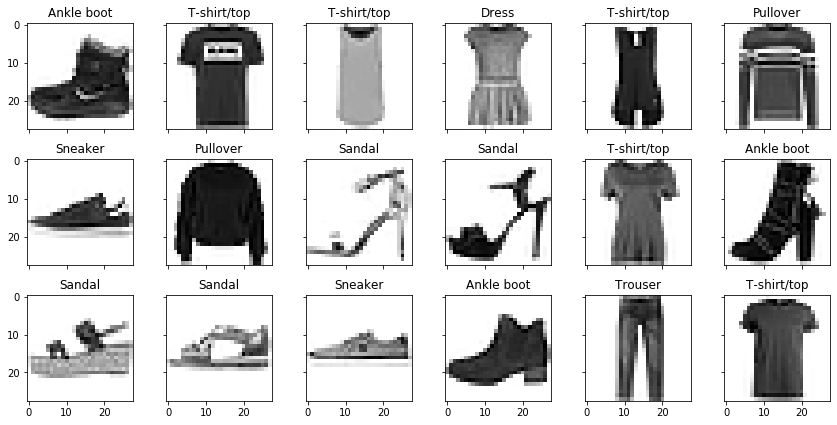

In [21]:
f, ax = plt.subplots(3, 6, sharex=True, sharey=True, figsize=(12, 6))
for i in range(3):
    for j in range(6):
        ax[i][j].imshow(train_images[i*6+j], cmap=plt.cm.binary)
        title = ax[i][j].set_title(class_dict[train_labels[i*6+j]])
        ax[i][j].set_axis_off
plt.tight_layout()

It is time to create the model and train it with the training images.  The model will first flatten the input images so that instead of each imaging being a 28x28 matrix, it will be a vector of length 28^2.  Then two dense layers are added to the model with the ReLU and softmax activiation function respectively.

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Now that we have the model, we need to train it.  To train, we will use the Adam optimizer and the sparse categorical crossentropy loss function.  We will run through the training data 5 times (epochs).

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3384 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3143 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8920


On the fifth epoch, we achieved around 89% accuracy. We do not want to overtrain our model, so five epochs is enough.  Now it is time to use our model to feed in the test images that it has not yet seen to see how well it predicts the clothing classification. 

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3472 - accuracy: 0.8757


We achieved 87.6% accuracy on the test data.  We can display the test images and the model's classification as the title.  If the model guessed incorrect, it will be labeled as read.

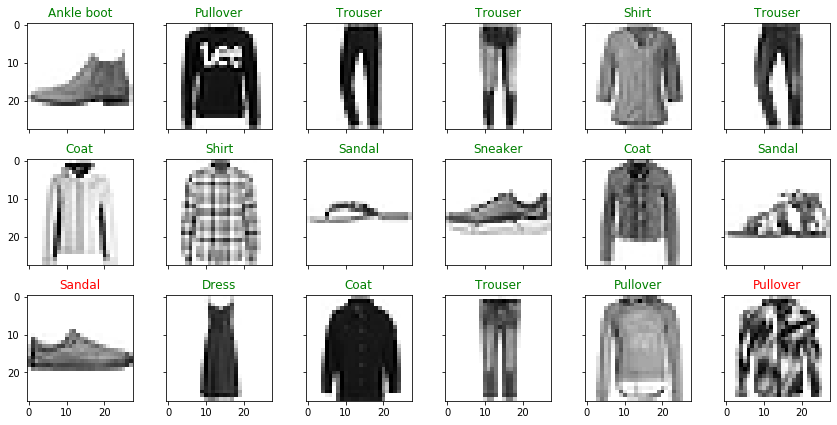

In [26]:
y = model.predict(test_images)
f, ax = plt.subplots(3, 6, sharex=True, sharey=True, figsize=(12, 6))
for i in range(3):
    for j in range(6):
        ax[i][j].imshow(test_images[i*6+j], cmap=plt.cm.binary)
        title = ax[i][j].set_title(class_dict[y[i*6+j].argmax()])
        plt.setp(title, color = ('g' if y[i*6+j].argmax() == test_labels[i*6+j] else 'r'))
        ax[i][j].set_axis_off
plt.tight_layout()